In [41]:
#24MAI0114-ABHAYNATH K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.svm import SVC



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from scipy import ndimage
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [42]:
#24MAI0114-ABHAYNATH K
#Load dataset
Train_Data = pd.read_csv(r"D:\VIT\AI ML\Dataset\data_set_ALL_AML_train.csv")
Test_Data = pd.read_csv(r"D:\VIT\AI ML\Dataset\data_set_ALL_AML_independent.csv")
labels = pd.read_csv(r"D:\VIT\AI ML\Dataset\actual.csv")

In [43]:
Train_Data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [44]:
#24MAI0114-ABHAYNATH K
#check for nulls
print(Train_Data.isna().sum().max())
print(Test_Data.isna().sum().max())

0
0


In [45]:
#24MAI0114-ABHAYNATH K
# Drop columns containing 'call' from Test_Data and Train_Data
cols = [col for col in Test_Data.columns if 'call' in col]
test = Test_Data.drop(cols, axis=1)  # Use axis=1 to drop columns

cols = [col for col in Train_Data.columns if 'call' in col]
train = Train_Data.drop(cols, axis=1)  # Use axis=1 to drop columns


In [46]:
#Join all the data
patients = [str(i) for i in range(1, 73, 1)]
df_all = pd.concat([train, test], axis = 1)[patients]

In [47]:
#24MAI0114-ABHAYNATH K
#transpose rows and columns
df_all = df_all.T

In [48]:
#24MAI0114-ABHAYNATH K
df_all["patient"] = pd.to_numeric(patients)
labels["cancer"]= pd.get_dummies(labels.cancer, drop_first=True)
# add the cancer column to train data

Data = pd.merge(df_all, labels, on="patient")

In [49]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,False
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,False
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,False
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,False
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,False


In [50]:
#24MAI0114-ABHAYNATH K
Data['cancer'].value_counts()

cancer
False    47
True     25
Name: count, dtype: int64

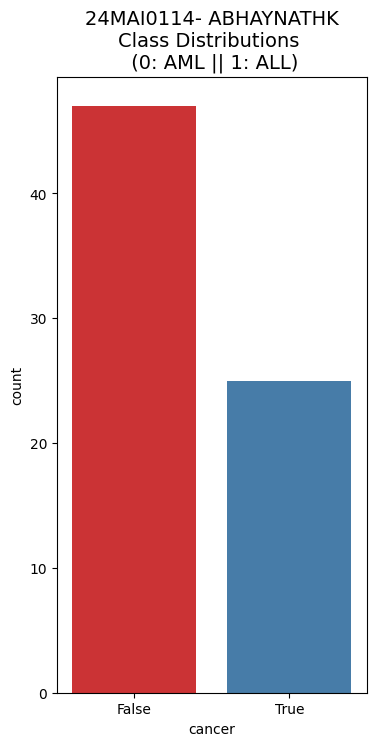

In [51]:
#24MAI0114-ABHAYNATH K
plt.figure(figsize=(4,8))
colors = ["AML", "ALL"]
sns.countplot(x='cancer', data=Data, palette="Set1")  # Pass 'x' as a keyword argument
plt.title('24MAI0114- ABHAYNATHK\nClass Distributions \n (0: AML || 1: ALL)', fontsize=14)
plt.show()


In [52]:
#24MAI0114-ABHAYNATH K
#X -> matrix of independent variable
#y -> vector of dependent variable
X, y = Data.drop(columns=["cancer"]), Data["cancer"]

In [53]:
X

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,patient
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,2
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,3
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,4
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-154,-136,49,180,-257,-273,141,-123,52,878,...,540,13,1075,-45,524,249,40,-68,-1,68
68,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,617,-34,738,11,742,234,72,109,-30,69
69,-55,-44,12,129,-108,-301,-222,-133,136,320,...,318,35,241,-66,320,174,-4,176,40,70
70,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,760,-38,201,-55,348,208,0,74,-12,71


In [54]:
#24MAI0114-ABHAYNATH K
y

0     False
1     False
2     False
3     False
4     False
      ...  
67    False
68    False
69    False
70    False
71    False
Name: cancer, Length: 72, dtype: bool

In [55]:
#24MAI0114-ABHAYNATH K
#split the dataset
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

<Axes: ylabel='Density'>

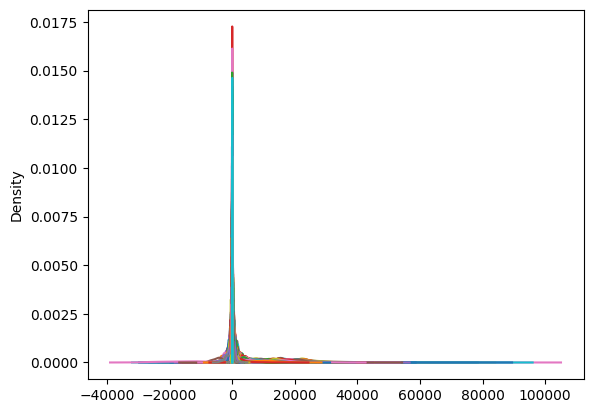

In [56]:
#24MAI0114-ABHAYNATH K
#before feature scaling
X_train = pd.DataFrame(X_train)
X_train.plot(kind="kde", legend=None)

Feature scaling

In [57]:
#24MAI0114-ABHAYNATH K
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Feature scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)


In [58]:
#24MAI0114-ABHAYNATH K
X_train.shape

(54, 7130)

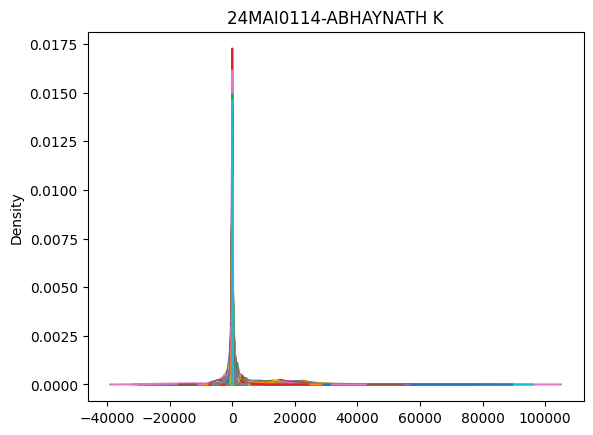

In [59]:
#24MAI0114-ABHAYNATH K
#after feature scaling
X_train = pd.DataFrame(X_train)
X_train.plot(kind="kde", legend=None)
plt.title("24MAI0114-ABHAYNATH K")
plt.show()

Dimentionality reduction using Principal Component Analysis(PCA)

28 features explain around 90% of the variance. From 7129 features to 28, not too bad.


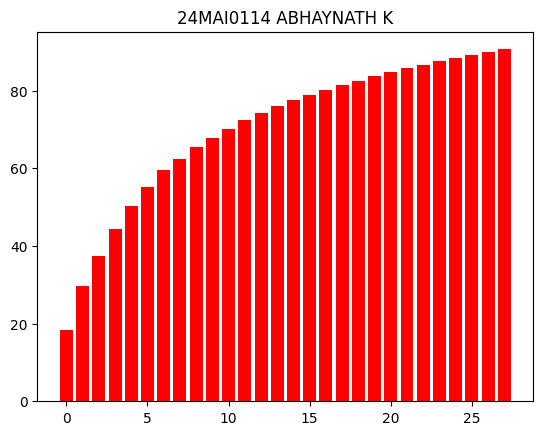

In [60]:
#24MAI0114-ABHAYNATH K
pca = PCA()
pca.fit_transform(X_train)

total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 90% of the variance. From 7129 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp,color = 'r')
plt.title("24MAI0114 ABHAYNATH K")
plt.show()

In [61]:
pca.n_components_

28

3D plot of first 3 principal components

In [62]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3).fit(X_train)
X_train_reduced = pca3.transform(X_train)

plt.clf()
fig = plt.figure(1, figsize=(10,6))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2], c = y_train, cmap='coolwarm', linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

C:\Users\Abhay\AppData\Local\Temp\ipykernel_44652\2949456674.py:12: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
C:\Users\Abhay\AppData\Local\Temp\ipykernel_44652\2949456674.py:14: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
C:\Users\Abhay\AppData\Local\Temp\ipykernel_44652\2949456674.py:16: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


[Text(-60000.0, 0, ''),
 Text(-40000.0, 0, ''),
 Text(-20000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(60000.0, 0, ''),
 Text(80000.0, 0, '')]

<Figure size 640x480 with 0 Axes>

Balacing the lables using SMOTE

In [63]:
from sklearn.utils import resample
from collections import Counter

print("Before Upsampling:-")
print(Counter(y_train))


# Let's use SMOTE to oversample
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_ov, y_train_ov = oversample.fit_resample(X_train_pca,y_train)

print("After Upsampling:-")
print(Counter(y_train_ov))

Before Upsampling:-
Counter({False: 39, True: 15})
After Upsampling:-
Counter({False: 39, True: 39})


Hyperprameter optimization for SVM

In [64]:
# do a grid search
svc_params = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

search = GridSearchCV(SVC(), svc_params, n_jobs=-1, verbose=1)
search.fit(X_train_ov, y_train_ov)

best_accuracy = search.best_score_ #to get best score
best_parameters = search.best_params_ #to get best parameters
# select best svc
best_svc = search.best_estimator_
best_svc

Fitting 5 folds for each of 40 candidates, totalling 200 fits


SVC(C=1, kernel='linear')

The accuracy of SVM is 1.0

Classification report :
               precision    recall  f1-score   support

       False       1.00      1.00      1.00         8
        True       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Text(0.5, 1.0, '24MAI0114 AVHAYNATHK\nROC - CURVE & AREA UNDER CURVE')

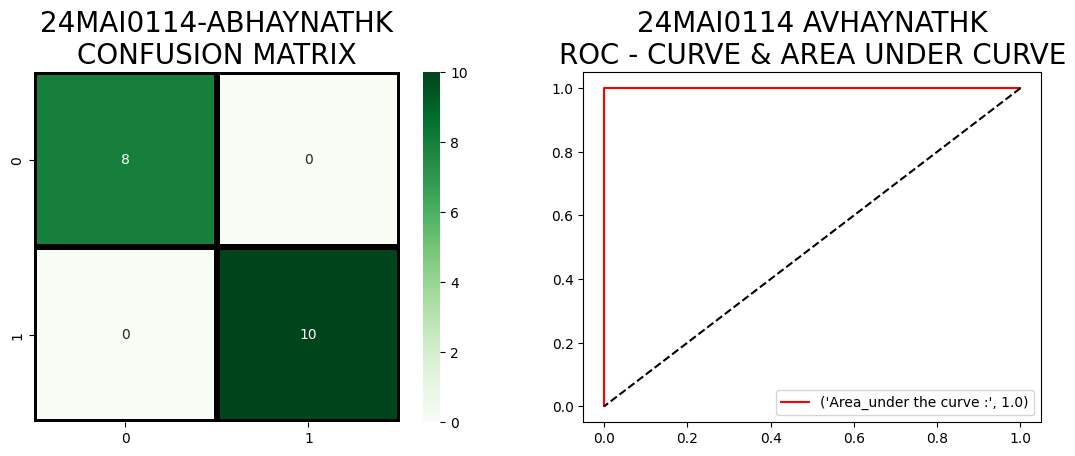

In [65]:
#build SVM model with best parameters
svc_model = SVC(C=1, kernel='linear',probability=True)

svc_model.fit(X_train_ov, y_train_ov)

prediction=svc_model.predict(X_test_pca)

acc_svc = accuracy_score(prediction,y_test)
print('The accuracy of SVM is', acc_svc)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("24MAI0114-ABHAYNATHK\nCONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = svc_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("24MAI0114 AVHAYNATHK\nROC - CURVE & AREA UNDER CURVE",fontsize=20)